# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Read the training and testing data

training_file = "/Users/srnimani/Desktop/Udacity/SelfDrivingCar/Traffic Signal/traffic-signs-data/train.p"
testing_file = "/Users/srnimani/Desktop/Udacity/SelfDrivingCar/Traffic Signal/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Number of training examples
n_train = 39209

# Number of testing examples.
n_test = 12630

# What's the shape of an traffic sign image?
image_shape = (32, 32, 3)

# How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

41
4


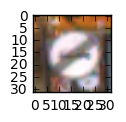

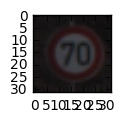

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

index = random.randint(0, len(X_test))
image = X_test[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_test[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)
29406
13
(32, 32, 3)
9803
12


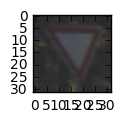

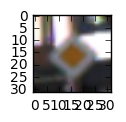

In [4]:
### Generate data additional data (OPTIONAL!)

# Split the training data into training and validation data

from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25)

# Testing the Training and Cross Validation Data Sets by displaying sample images
# taken from the sets

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# Also check the shape and length

print(np.shape(image))
print(len(X_train))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.figure(figsize=(1,1))
print(y_train[index])

index = random.randint(0, len(X_validate))
image = X_validate[index].squeeze()
                                           
print(np.shape(image))
print(len(X_validate))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.figure(figsize=(1,1))
print(y_validate[index])


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [5]:
# After the data exploration, I my first task was to convert from color to grayscale and then use the LeNet structure 
# The grayscale did not workout as well as I wanted, and so went back to RGB
# I then used the Sklearn package to split the training set into training and cross validation set using 80:20 rule,
# as a general rule of thumb suggests.. Did not try changing the set values
# I shuffled the data as well to ensure that model trains better and does not get stuck in any local minima
# Set the Epochs and Batch sizes

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Setup the tensor flow

import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [7]:
### As mentioned above, my data set had the training and cross validation data in the ratio of 75:25 and used
### the cross validation data as is. Including the testing data, the ratio came to 0.57:0.19:0.24 for the three
### sets (training:cross-validation:testing).. I had tried the validation @ 20% of the training set, but found 25% 
### offer better validation accuracy

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [8]:
# The final architecture has the standard LeNet structure with the following layers

# Layer 1: Convolutional. The output shape should be 28x28x6.
# Activation. Using ReLU.
# Pooling. The output shape is 14x14x6.
# Layer 2: Convolutional. The output shape is 10x10x16.
# Activation. using ReLU.
# Pooling. The output shape is 5x5x16.
# Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.
# Layer 3: Fully Connected. This has 120 outputs.
# Activation. using ReLU.
# Layer 4: Fully Connected. This has 84 outputs.
# Activation. using ReLU.
# Layer 5: Fully Connected (Logits). Has 43 outputs, same as the number of labels
# Output - Return the result of the 2nd fully connected layer.

In [9]:
# Neural Network Architecture (LeNet), as described above, works on RG inputs, changed the output labels to 43

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.05
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation Layer. Use the standard ReLU
    
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation. Again standard ReLU function
    
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation, using ReLU again
    
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation. ReLU..
    
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
        
    return logits

In [10]:
# Features and Labels
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

In [11]:
# Created the training model with a training rate of 0.001, and using softmax. Objective was to reduce the cost 
# or improve the training accuracy
#
# Resubmission Text: *** Selectd the batch size of 128 (had tried with 256 and expectde better 
# results), as other sized did not yield any additional benefits
# 
# Epocks were left @ 10, as I noticed that after 7 or 8, the values were not improving, and I
# was running on my laptop, without a GPU or an AWS account, did not want to spend much time 
# in computing ***
#
# Evaluated the model to see how well the loss and accuracy of the model for a given dataset.
# 
# Ran the training data through the training pipeline to train the model. Before each epoch, shuffled the training set.
# After each epoch, measured the loss and accuracy of the validation set and saved the model after training.
# 
# See the cells below

In [12]:
# Training the pipeline
# Create a training pipeline that uses the model to classify the Traffic Data

rate = 0.001

logits = LeNet(x)
softmax = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
# Model Evaluation
# Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
# Train the Model
# Run the training data through the training pipeline to train the model.
# Before each epoch, shuffle the training set.
# After each epoch, measure the loss and accuracy of the validation set.
# Save the model after training.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validate, y_validate)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.871

EPOCH 2 ...
Validation Accuracy = 0.928

EPOCH 3 ...
Validation Accuracy = 0.954

EPOCH 4 ...
Validation Accuracy = 0.960

EPOCH 5 ...
Validation Accuracy = 0.966

EPOCH 6 ...
Validation Accuracy = 0.972

EPOCH 7 ...
Validation Accuracy = 0.967

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.971

EPOCH 10 ...
Validation Accuracy = 0.970

Model saved


In [15]:
print(np.shape(logits))
print(logits)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(softmax, feed_dict={x: X_test[0:len(X_test)]})
print(output)

()
Tensor("add_4:0", shape=(?, 43), dtype=float32)
[[  9.47480439e-04   1.38197802e-02   1.35254383e-03 ...,   1.77390613e-02
    1.52381733e-01   1.17592211e-03]
 [  4.80680637e-06   1.22771342e-03   3.86390457e-05 ...,   3.69161181e-02
    5.89144565e-02   1.08113702e-04]
 [  1.43300183e-03   1.87552124e-02   4.14333353e-03 ...,   2.12933347e-02
    1.50313139e-01   3.08501092e-03]
 ..., 
 [  9.59301833e-03   2.55185459e-02   1.36169530e-02 ...,   4.59490046e-02
    5.82007095e-02   1.46724461e-02]
 [  1.42338965e-02   2.48354059e-02   1.47137651e-02 ...,   2.92237997e-02
    5.08330315e-02   1.57898441e-02]
 [  1.29887797e-02   2.70919539e-02   1.51503375e-02 ...,   4.76045199e-02
    5.58384433e-02   1.53642315e-02]]


In [16]:
# Evaluate the Model
# To be run only once!

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    output = sess.run(softmax, feed_dict={x: X_test[0:len(X_test)]})
    #print(output)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.898


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In [17]:
# I played around with several of the parameters - Batch-size, Standard Deviation (sigma).. The one that the maximum
# impact was sigma.. increasing from 0.1 to 0.2 made the validation accuracy worse (less than 20%), whereas 
# making it 0.05 incerased the accuracy close to 98%. The batch-size from 128 to 256, did not make much difference.
# I tried multiple runs with the same parameters, and due to random shuffling the results were random, and the best 
# accuracy (of 98%) was achieved with a sigma of 0.05, batch size of 128 and validation set of 25% of the training set.
#
# I looked at other activation functions, and among sigmoid, tanh and ReLU, ReLu was rated the best as it was first 
# and does not have vanishing gradient problem, noted in the literature.
#

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [18]:
### Load the images and plot them here.
### This directory has 5 images taken from the web
### Reduce the size of the images to 32 x 32 as required by our model

from scipy import misc
from scipy.ndimage import imread
import glob
import cv2

test_lib =[]
for image_path in glob.glob("/Users/srnimani/CarND-Traffic-Sign-Classifier-Project/Test Images/*.*"):
    image = misc.imread(image_path)
    image_reduced = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA) #, Image.ANTIALIAS)
    test_lib.append(image_reduced)
print(np.shape(test_lib))


(5, 32, 32, 3)


In [19]:
# Assign y test values for the 5 images by looking up the signnames.csv for a closest match

y_test_lib =[1, 39, 27, 12, 33] 
print(y_test_lib)

[1, 39, 27, 12, 33]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [20]:
# I have taken 5 signs from the web (all German signs) for checking out how the model predicts.. while I expected 
# 
# Resubmission New Text: *** I realized that the results were not not 100% accurate as predicted, 
# because the symbols were not Triangular as in the rest of data set, but round.. ***
#

5
5
1
39
27
12
33


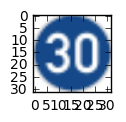

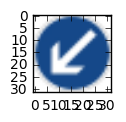

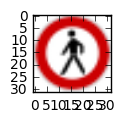

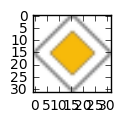

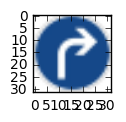

In [21]:
# Select all images from the lib created and display
print(len(y_test_lib))
print(len(test_lib))
assert(len(y_test_lib) == len(test_lib))
for i in range (len(test_lib)):
    print(y_test_lib[i])
    plt.figure(figsize=(1,1))
    image = test_lib[i]
    plt.imshow(test_lib[i], cmap="gray")
    plt.figure(figsize=(1,1))
    

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [22]:
### Run the predictions here.

import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(test_lib, y_test_lib)    
    ### Visualize the softmax probabilities 
    prediction = sess.run(softmax, feed_dict={x: test_lib[0:len(test_lib)]})
    print("Test Accuracy = {:.3f}".format(test_accuracy))
print(prediction)

Test Accuracy = 0.600
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   4.69756777e-26   0.00000000e+00   0.00000000e+00
    2.14064263e-27   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.26047486e-20   3.07307184e-36   6.42457544e-37   1.82748067e-10
    0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   4.27002197e-36   1.75863964e-23   3.16547634e-34
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.01606784e-33   3.75516436e-29   0.00000000e+00
    3.05340300e-30   3.26128914e-20   4.89187790e-18   6.14111772e-29
    7.52331900e-26   3.87787321e-35   0.00000000e+00]
 [  0.00000000e+00   9.89996266e-28   7.80584867e-17   1.66212347e-35
    4.17903879e-28   8.05293451e-30   0.00000000e+00   9.91697151e-28
    9.71209513e-31   8.54969603e-32   0.00000000e+00   5.68292623e-27
    0.00000000

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [23]:
# Initialize and get the top 5 values and the corresponding indices for each of the 5 images
init_op = tf.global_variables_initializer()

with tf.Session() as sess: 
    sess.run(init_op)
    topFive = sess.run(tf.nn.top_k(tf.constant(prediction), k=5))    
    values = np.array([topFive.values])
    print(np.shape(values))
    indices = np.array([topFive.indices])
    print(np.shape(indices))
print(topFive)

(1, 5, 5)
(1, 5, 5)
TopKV2(values=array([[  1.00000000e+00,   1.82748067e-10,   4.89187790e-18,
          3.26128914e-20,   1.26047486e-20],
       [  9.99999881e-01,   9.71087459e-08,   9.04073247e-15,
          7.80584867e-17,   1.39240171e-18],
       [  9.91387427e-01,   5.60258888e-03,   1.98987662e-03,
          1.01020769e-03,   9.84167218e-06],
       [  9.99999762e-01,   2.18487571e-07,   4.06371184e-20,
          1.32604444e-21,   8.57034340e-22],
       [  1.00000000e+00,   1.27679334e-20,   2.05575425e-21,
          2.98492547e-22,   1.77133201e-22]], dtype=float32), indices=array([[18, 15, 38, 37, 12],
       [39, 33, 24,  2, 37],
       [ 2,  5, 38, 40,  1],
       [12, 13, 41, 42, 15],
       [33, 18, 37, 39, 26]], dtype=int32))


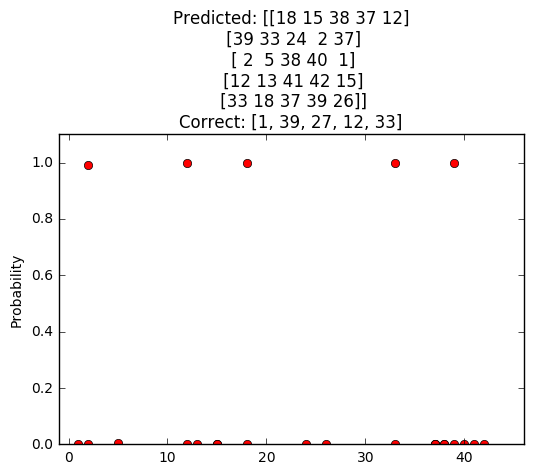

raw top_k results:

tf.nn.top_k(prediction, 5).values  [array([  1.00000000e+00,   1.82748067e-10,   4.89187790e-18,
         3.26128914e-20,   1.26047486e-20], dtype=float32), array([  9.99999881e-01,   9.71087459e-08,   9.04073247e-15,
         7.80584867e-17,   1.39240171e-18], dtype=float32), array([  9.91387427e-01,   5.60258888e-03,   1.98987662e-03,
         1.01020769e-03,   9.84167218e-06], dtype=float32), array([  9.99999762e-01,   2.18487571e-07,   4.06371184e-20,
         1.32604444e-21,   8.57034340e-22], dtype=float32), array([  1.00000000e+00,   1.27679334e-20,   2.05575425e-21,
         2.98492547e-22,   1.77133201e-22], dtype=float32)]
tf.nn.top_k(prediction, 5).indices [array([18, 15, 38, 37, 12], dtype=int32), array([39, 33, 24,  2, 37], dtype=int32), array([ 2,  5, 38, 40,  1], dtype=int32), array([12, 13, 41, 42, 15], dtype=int32), array([33, 18, 37, 39, 26], dtype=int32)]




In [24]:
def plot_top_k_probabilities(pred_cls, pred_prob, title):
    plt.plot(list(pred_cls), list(pred_prob), 'ro')
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1-1,x2+1,y1,y2+0.1))

    plt.ylabel('Probability')
    plt.title(title) 
    plt.show()    
    

for i in range(len(values)):
               
    predicted_class = indices[i] #.[np.argmax(values[i])]    
    correct_class = y_test_lib
    
    plot_title = 'Predicted: {}\nCorrect: {}'.format(predicted_class, correct_class)     
    plot_top_k_probabilities(indices[i], values[i], plot_title)
    
    print('raw top_k results:')
    print('')
    print('tf.nn.top_k(prediction, 5).values ', list(values[i]))
    print('tf.nn.top_k(prediction, 5).indices', list(indices[i]))    
    
    print('')
    print('')

In [1]:
# Resubmission Text: *** As can be seen be seen from the image above, the predictor is very
# certain on its results - with a 100% probability for one (top prediction) and 0 for the rest
# for all 5 images. This may mean that the model does not need any retuning/ or need any 
# new network architecture. ***